# 无监督学习：聚类

无监督学习是一种对不含标记的数据建立模型的机器学习范式。到目前为止，我们处理的数据都带有某种形式的标记，也就是说，学习算法可以根据标记看到这些数据，并对数据进行分类。但是，在无监督学习的世界中，我们没有这样的条件了。需要用一些相似性指标对数据集进行分组时，就会用到这些算法了。

最常见的无监督学习方法就是聚类，你一定对这个词耳熟能详。当需要把无标记的数据分成几种集群时，就要用它来分析。这些集群通常是根据某种相似度指标进行划分的，例如欧氏距离（Euclidean distance）。无监督学习广泛应用于各种领域，如数据挖掘、医学影像、股票市场分析、计算机视觉、市场细分等。

### 1 用k-means算法聚类数据

k-means算法是最流行的聚类算法之一。这个算法常常利用数据的不同属性将输入数据划分为k组。分组是使用最优化的技术实现的，即让各组内的数据点与该组中心点的距离平方和最小化。

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

In [11]:
from sklearn.model_selection import *

# Load multivar data in the input file
# Load multivar data in the input file
def load_data(input_file):
    X = []
    with open(input_file, 'r') as f:
        for line in f.readlines():
            data = [float(x) for x in line.split(',')]
            X.append(data)

    return np.array(X)

# Plot the classifier boundaries on input data
def plot_classifier(classifier, X, y, title='Classifier boundaries', annotate=False):
    # define ranges to plot the figure 
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0

    # denotes the step size that will be used in the mesh grid
    step_size = 0.01

    # define the mesh grid
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

    # compute the classifier output
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # reshape the array
    mesh_output = mesh_output.reshape(x_values.shape)

    # Plot the output using a colored plot 
    plt.figure()

    # Set the title
    plt.title(title)

    # choose a color scheme you can find all the options 
    # here: http://matplotlib.org/examples/color/colormaps_reference.html
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes
    plt.xticks(())
    plt.yticks(())

    if annotate:
        for x, y in zip(X[:, 0], X[:, 1]):
            # Full documentation of the function available here: 
            # http://matplotlib.org/api/text_api.html#matplotlib.text.Annotation
            plt.annotate(
                '(' + str(round(x, 1)) + ',' + str(round(y, 1)) + ')',
                xy = (x, y), xytext = (-15, 15), 
                textcoords = 'offset points', 
                horizontalalignment = 'right', 
                verticalalignment = 'bottom', 
                bbox = dict(boxstyle = 'round,pad=0.6', fc = 'white', alpha = 0.8),
                arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0'))

# Print performance metrics
def print_accuracy_report(classifier, X, y, num_validations=5):
    accuracy = cross_val_score(classifier, 
            X, y, scoring='accuracy', cv=num_validations)
    print("Accuracy: " + str(round(100*accuracy.mean(), 2)) + "%")

    f1 = cross_val_score(classifier, 
            X, y, scoring='f1_weighted', cv=num_validations)
    print("F1: " + str(round(100*f1.mean(), 2)) + "%")

    precision = cross_val_score(classifier, 
            X, y, scoring='precision_weighted', cv=num_validations)
    print("Precision: " + str(round(100*precision.mean(), 2)) + "%")

    recall = cross_val_score(classifier, 
            X, y, scoring='recall_weighted', cv=num_validations)
    print("Recall: " + str(round(100*recall.mean(), 2)) + "%")

In [12]:
# 载入数据
data = load_data('../data/classic/data_multivar4.txt')
num_clusters = 4

([], <a list of 0 Text yticklabel objects>)

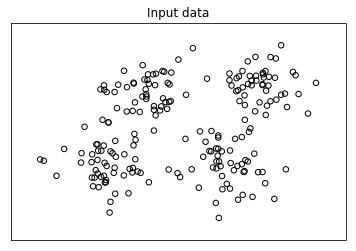

In [13]:
# 可视化
plt.figure()
plt.scatter(data[:, 0], data[:, 1], marker='o', facecolors='none', edgecolors='k', s=30)
x_min, x_max = min(data[:, 0]) - 1, max(data[:, 0]) + 1
y_min, y_max = min(data[:, 1]) - 1, max(data[:, 1]) + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [14]:
# 训练模型
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
# 可视化边界

# 设置网格数据的步长
step_size = 0.01
# 画出边界
x_min, x_max = min(data[:, 0]) - 1, max(data[:, 0]) + 1
y_min, y_max = min(data[:, 1]) - 1, max(data[:, 1]) + 1
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min,
y_max, step_size))
# 预测网格中所有数据点的标记
predicted_labels = kmeans.predict(np.c_[x_values.ravel(), y_values.ravel()])

([], <a list of 0 Text yticklabel objects>)

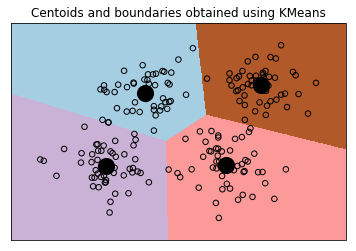

In [16]:
# 画出结果
predicted_labels = predicted_labels.reshape(x_values.shape)
plt.figure()
plt.clf()
plt.imshow(predicted_labels, interpolation='nearest', extent=(x_values.min(), x_values.max(), y_values.min(), y_values.max()),
cmap=plt.cm.Paired,
aspect='auto', origin='lower')
plt.scatter(data[:,0], data[:,1], marker='o',
facecolors='none', edgecolors='k', s=30)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], marker='o', s=200, linewidths=3,
color='k', zorder=10, facecolors='black')
x_min, x_max = min(data[:, 0]) - 1, max(data[:, 0]) + 1
y_min, y_max = min(data[:, 1]) - 1, max(data[:, 1]) + 1
plt.title('Centoids and boundaries obtained using KMeans')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

### 2 用矢量量化压缩图片

k-means聚类的主要应用之一就是矢量量化。简单来说，矢量量化就是“四舍五入”（rounding off）的N维版本。在处理数字等一维数据时，会用四舍五入技术减少存储空间。

In [20]:
import argparse
import numpy as np
from scipy import misc
from sklearn import cluster
import matplotlib.pyplot as plt

In [21]:
# 解析输入参数
def build_arg_parser():
    parser = argparse.ArgumentParser(description='Compress the input image using clustering')
    parser.add_argument("--input-file", dest="input_file", required=True, help="Input image")
    parser.add_argument("--num-bits", dest="num_bits", required=False, type=int, help="Number of bits used to represent each pixel")
    return parser

In [22]:
# 压缩输入的图片
def compress_image(img, num_clusters):
    # 将输入的图片转换成（样本量，特征量） 数组，以运行k-means聚类算法
    X = img.reshape((-1, 1))
    # 对输入数据运行k-means聚类
    kmeans = cluster.KMeans(n_clusters=num_clusters, n_init=4, random_state=5)
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_.squeeze()
    labels = kmeans.labels_
    # 为每个数据配置离它最近的中心点，并转变为图片的形状
    input_image_compressed = np.choose(labels, centroids).reshape(img.shape)
    return input_image_compressed

In [31]:
def plot_image(img, title):
    vmin = img.min()
    vmax = img.max()
    plt.figure()
    plt.title(title)
    plt.imshow(img, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)

In [34]:
input_file = '../data/classic/flower_image.jpg'
num_bits = 2

if not 1 <= num_bits <= 8:
    raise TypeError('Number of bits should be between 1 and 8')
    
num_clusters = np.power(2, num_bits)

# 打印压缩率
compression_rate = round(100 * (8.0 - num_bits) / 8.0, 2)
print("\nThe size of the image will be reduced by a factor of", 8.0/num_bits)
print("\nCompression rate = " + str(compression_rate) + "%")


The size of the image will be reduced by a factor of 4.0

Compression rate = 75.0%


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


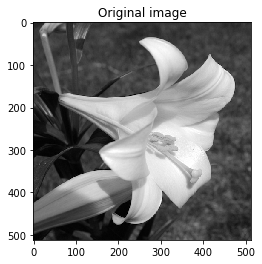

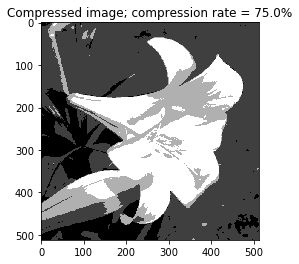

In [35]:
# 加载输入图片
input_image = misc.imread(input_file, True).astype(np.uint8)
# 显示原始图片
plot_image(input_image, 'Original image')

# 压缩图片
input_image_compressed = compress_image(input_image, num_clusters)

# 画图
plot_image(input_image_compressed, 'Compressed image; compression rate = ' + str(compression_rate) + '%')